In [1]:
import time
start_time=time.time()

In [2]:
from pathlib import Path
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import itertools
#from scipy import stats
#import statsmodels.api as sm
#from statsmodels.sandbox.regression.predstd import wls_prediction_std
#from scipy.stats import linregress
import pickle

In [3]:
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="10"

Previous structure functions

50

http://articles.adsabs.harvard.edu//full/1951ZA.....30...17V/0000045.000.html

http://articles.adsabs.harvard.edu//full/1958RvMP...30.1035M/0001037.000.html

60

http://articles.adsabs.harvard.edu//full/1961MNRAS.122....1F/0000012.000.html

70

https://ui.adsabs.harvard.edu/abs/1970A%26A.....8..486L/abstract

80

http://articles.adsabs.harvard.edu//full/1985ApJ...288..142R/0000146.000.html 

https://ui.adsabs.harvard.edu/abs/1986ApJ...304..767O/abstract

http://articles.adsabs.harvard.edu//full/1987ApJ...317..686O/0000688.000.html

http://articles.adsabs.harvard.edu//full/1988ApJS...67...93C/0000122.000.html

90

http://articles.adsabs.harvard.edu//full/1995ApJ...454..316M/0000324.000.html 

https://iopscience.iop.org/article/10.1086/304573/fulltext/33796.text.html#fg4

https://ui.adsabs.harvard.edu/abs/1999intu.conf..154J/abstract 

https://ui.adsabs.harvard.edu/abs/1999A%26A...346..947C/abstract

00


https://iopscience.iop.org/article/10.1088/0004-637X/700/2/1847#apj311588f19

10


https://academic.oup.com/mnras/article/413/2/721/1062900

https://academic.oup.com/mnras/article/463/3/2864/2646581

https://ui.adsabs.harvard.edu/abs/2019arXiv191203543M/abstract



Galactic HII regions

In [4]:
Sample='galactic-regions'

samples=pd.read_csv('name-list//'+Sample+'.csv',header=None)

DataNH=dict()
DataH=dict()

In [5]:
for i in range(len(samples)):
    DataNH[i]=samples[0][i]
    
for i in range(len(samples)):
    DataH[i]=pd.read_csv('data-previous-structure-functions//'+DataNH[i]+'.csv')    

In [6]:
samples

,0
0,1951VHOrion1
1,1951VHOrion2
2,1958MchOrion
3,1985RyJcsSh142
4,1986RoyM17
5,1986Od1499
6,1986Od7000
7,1986OdS252
8,1987OdCast6514
9,1987OdCast6523A


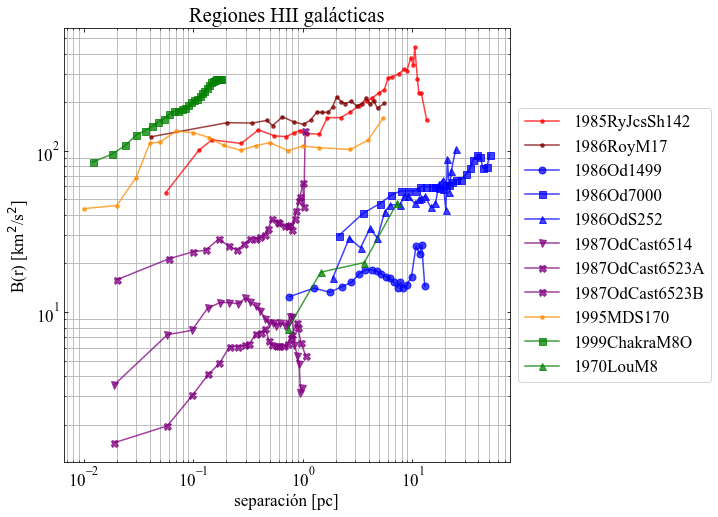

In [7]:
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"


fig, ax=plt.subplots(figsize=(8,8))

#plt.loglog(DataH[0].pc,DataH[0].S,marker='.',color='orangered',alpha=0.75, markersize=10, label=  DataNH[0])
#plt.loglog(DataH[1].pc,DataH[1].S,marker='.',color='orangered',alpha=0.75, markersize=10, label=  DataNH[1])
#plt.loglog(DataH[2].pc,DataH[2].S,marker='.',color='orange',alpha=0.75, markersize=10, label=  DataNH[2])
plt.loglog(DataH[3].pc,DataH[3].S,marker='.',color='red',alpha=0.75, markersize=7, label=  DataNH[3])
plt.loglog(DataH[4].pc,DataH[4].S,marker='.',color='maroon',alpha=0.75, markersize=7, label=  DataNH[4])
plt.loglog(DataH[5].pc,DataH[5].S,marker='o',color='blue',alpha=0.75, markersize=7, label=  DataNH[5])
plt.loglog(DataH[6].pc,DataH[6].S,marker='s',color='blue',alpha=0.75, markersize=7, label=  DataNH[6])
plt.loglog(DataH[7].pc,DataH[7].S,marker='^',color='blue',alpha=0.75, markersize=7, label=  DataNH[7])
plt.loglog(DataH[8].pc,DataH[8].S,marker='v',color='purple',alpha=0.75, markersize=7, label=  DataNH[8])
plt.loglog(DataH[9].pc,DataH[9].S,marker='X',color='purple',alpha=0.75, markersize=7, label=  DataNH[9])
plt.loglog(DataH[10].pc,DataH[10].S,marker='X',color='purple',alpha=0.75, markersize=7, label=  DataNH[10])
plt.loglog(DataH[17].pc,DataH[17].S,marker='.',color='darkorange',alpha=0.75, markersize=7, label=  DataNH[17])
#plt.loglog(DataH[18].pc,DataH[18].S,marker='o',color='red',alpha=0.75, markersize=10, label=  DataNH[18])
#plt.loglog(DataH[20].pc,DataH[20].S,marker='o',color='red',alpha=0.75, markersize=10, label=  DataNH[20])
plt.loglog(DataH[25].pc*0.006,DataH[25].S,marker='s',color='green',alpha=0.75, markersize=7, label=  DataNH[25])
plt.loglog(DataH[26].pc*0.363,DataH[26].S**2,marker='^',color='green',alpha=0.75, markersize=7, label=  DataNH[26])


    
ax.set(xlabel='separación [pc]', ylabel='B(r) [km$^{2}$/s$^{2}$]')
plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)
plt.grid(which='minor')

plt.title('Regiones HII galácticas')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    


fig.savefig('plots/funciones-ghr.pdf', 
              bbox_inches='tight')
#

GEHR

In [8]:
Sample='extragalactic-regions'

samples1=pd.read_csv('name-list//'+Sample+'.csv',header=None)

DataNG=dict()
DataG=dict()


for i in range(len(samples1)):
    DataNG[i]=samples1[0][i]
    
for i in range(len(samples1)):
    DataG[i]=pd.read_csv('data-previous-structure-functions//'+DataNG[i]+'.csv')    

In [9]:
samples1

,0
0,1961Fst30Dor
1,1997MT604
2,2009Lagr595H
3,2009Lagr595O
4,2009Lagr595S
5,2011Lagr595H
6,2011Lagr595Hf
7,2011Lagr595O
8,2011Lagr595Of
9,2011Lagr595S


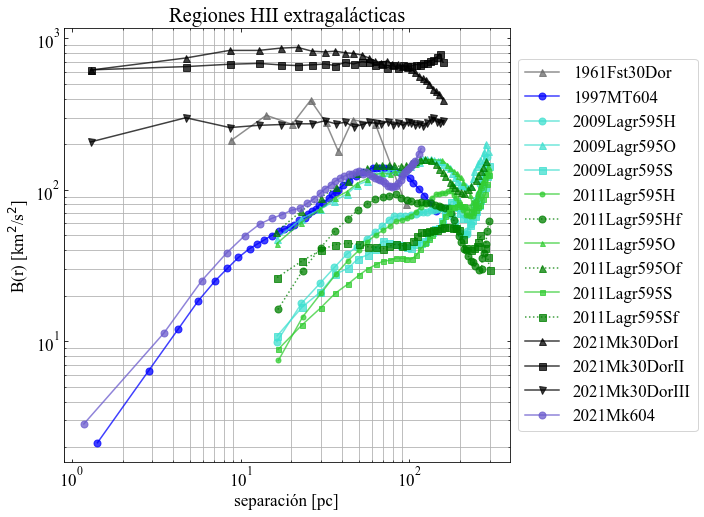

In [10]:
fig, ax=plt.subplots(figsize=(8,8))

n=7

plt.loglog(DataG[0].pc,DataG[0].S,marker='^',color='dimgray',alpha=0.75, markersize=n, label= DataNG[0])
plt.loglog(DataG[1].pc,DataG[1].S,marker='o',color='blue',alpha=0.75, markersize=n, label= DataNG[1])
plt.loglog(DataG[2].pc,DataG[2].S,marker='o',color='turquoise',alpha=0.75, markersize=n, label= DataNG[2])
plt.loglog(DataG[3].pc,DataG[3].S,marker='^',color='turquoise',alpha=0.75, markersize=n, label= DataNG[3])
plt.loglog(DataG[4].pc,DataG[4].S,marker='s',color='turquoise',alpha=0.75, markersize=n, label= DataNG[4])
plt.loglog(DataG[5].pc,DataG[5].S*5.92**2,marker='o',color='limegreen',alpha=0.75, markersize=5, label= DataNG[5])
plt.loglog(DataG[6].pc,DataG[6].S*5.92**2,marker='o',color='green',alpha=0.75, markersize=n, label= DataNG[6],linestyle='dotted')
plt.loglog(DataG[7].pc,DataG[7].S*8.12**2,marker='^',color='limegreen',alpha=0.75, markersize=5, label= DataNG[7])
plt.loglog(DataG[8].pc,DataG[8].S*8.12**2,marker='^',color='green',alpha=0.75, markersize=n, label= DataNG[8],linestyle='dotted')
plt.loglog(DataG[9].pc,DataG[9].S*4.85**2,marker='s',color='limegreen',alpha=0.75, markersize=5, label= DataNG[9])
plt.loglog(DataG[10].pc,DataG[10].S*4.85**2,marker='s',color='green',alpha=0.75, markersize=n, label= DataNG[10],linestyle='dotted')

plt.loglog(DataG[11].pc,DataG[11].S*18.2**2,marker='^',color='black',alpha=0.75, markersize=n, label= DataNG[11])
plt.loglog(DataG[12].pc,DataG[12].S*14.5**2,marker='s',color='black',alpha=0.75, markersize=n, label= DataNG[12])
plt.loglog(DataG[13].pc,DataG[13].S*11.6**2,marker='v',color='black',alpha=0.75, markersize=n, label= DataNG[13])

plt.loglog(DataG[14].pc,DataG[14].S*7.2**2,marker='o',color='slateblue',alpha=0.75, markersize=n, label= DataNG[14])

    
ax.set(xlabel='separación [pc]', ylabel='B(r) [km$^{2}$/s$^{2}$]')
plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)
plt.grid(which='minor')
plt.title('Regiones HII extragalácticas')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
fig.savefig('plots/funciones-gehr.pdf', 
              bbox_inches='tight')

Comparison with our results

In [11]:
results_path = Path(r"~/Documents/Aeon/GitHub/PhD.Paper/Results/").expanduser()

In [12]:
samples_results=pd.read_csv(results_path/'file-names.csv',header=None)


SFresults = {}

for i in range(len(samples_results)):
    pickle_in = open(str(results_path) + '/SF' + samples_results[0][i] + '.pkl',"rb")
    df = pickle.load(pickle_in)
    SFresults[samples_results[0][i]] = df

In [13]:
samples_results

,0
0,N604H
1,N595
2,HX
3,HV
4,Dor
5,CarC
6,N346
7,M8
8,OrionLH
9,OrionS


NGC 604

In [14]:
mask = SFresults[samples_results[0][0]]["SF"]["N pairs"] > 0
B_604 = SFresults[samples_results[0][0]]["b2"][mask]
r_604 = SFresults[samples_results[0][0]]["s"][mask]

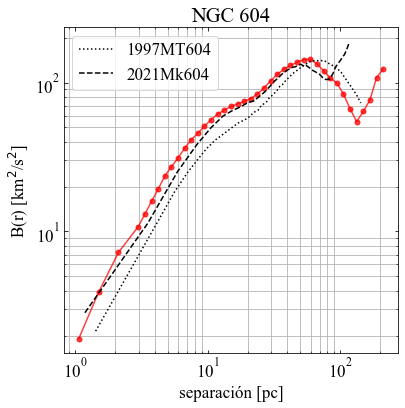

In [15]:
fig, ax=plt.subplots(figsize=(6,6))

plt.loglog(r_604,B_604,marker='o',color='red',alpha=0.75, markersize=5)
plt.loglog(DataG[1].pc,DataG[1].S,color='black',alpha=1,linestyle='dotted' , label= DataNG[1])
plt.loglog(DataG[14].pc,DataG[14].S*7.2**2,color='black',alpha=1,linestyle='dashed' , label= DataNG[14])

ax.set(xlabel='separación [pc]', ylabel='B(r) [km$^{2}$/s$^{2}$]')
plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)
plt.grid(which='minor')
plt.title('NGC 604')
plt.legend()
fig.savefig('plots/comp-604.pdf', 
              bbox_inches='tight')

30 Doradus

In [16]:
mask = SFresults[samples_results[0][4]]["SF"]["N pairs"] > 0
B_Dor = SFresults[samples_results[0][4]]["b2"][mask]
r_Dor = SFresults[samples_results[0][4]]["s"][mask]

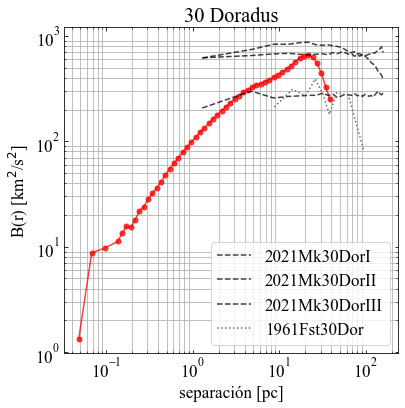

In [17]:
fig, ax=plt.subplots(figsize=(6,6))

plt.loglog(r_Dor,B_Dor,marker='o',color='red',alpha=0.75, markersize=5)
plt.loglog(DataG[11].pc,DataG[11].S*18.2**2,color='black',alpha=0.75,linestyle='dashed' , label= DataNG[11])
plt.loglog(DataG[12].pc,DataG[12].S*14.5**2,color='black',alpha=0.75,linestyle='dashed' , label= DataNG[12])
plt.loglog(DataG[13].pc,DataG[13].S*11.6**2,color='black',alpha=0.75,linestyle='dashed' , label= DataNG[13])
plt.loglog(DataG[0].pc,DataG[0].S,color='dimgray',alpha=1,linestyle='dotted' , label= DataNG[0])

ax.set(xlabel='separación [pc]', ylabel='B(r) [km$^{2}$/s$^{2}$]')
plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)
plt.grid(which='minor')
plt.title('30 Doradus')
plt.legend()

fig.savefig('plots/comp-30Dor.pdf', 
              bbox_inches='tight')

NGC 595

In [18]:
mask = SFresults[samples_results[0][1]]["SF"]["N pairs"] > 0
B_595 = SFresults[samples_results[0][1]]["b2"][mask]
r_595 = SFresults[samples_results[0][1]]["s"][mask]

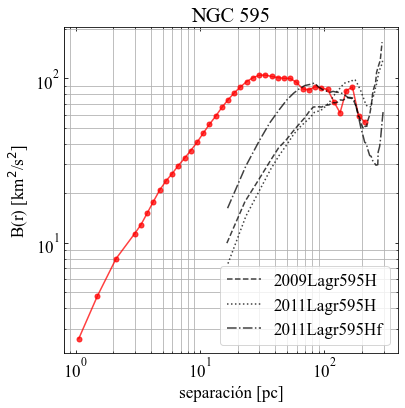

In [19]:
fig, ax=plt.subplots(figsize=(6,6))


plt.loglog(r_595,B_595,marker='o',color='red',alpha=0.75, markersize=5)
plt.loglog(DataG[2].pc,DataG[2].S,color='black',alpha=0.75,linestyle='dashed' , label= DataNG[2])
plt.loglog(DataG[5].pc,DataG[5].S*5.92**2,color='black',alpha=0.75,linestyle='dotted' , label= DataNG[5])
plt.loglog(DataG[6].pc,DataG[6].S*5.92**2,color='black',alpha=0.75,label= DataNG[6],linestyle='dashdot')

ax.set(xlabel='separación [pc]', ylabel='B(r) [km$^{2}$/s$^{2}$]')
plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)
plt.grid(which='minor')
plt.title('NGC 595')
plt.legend()
fig.savefig('plots/comp-595.pdf', 
              bbox_inches='tight')

M8

In [20]:
#mask = SFresults[samples_results[0][7]]["SF"]["N pairs"] > 0
B_M8 = SFresults[samples_results[0][7]]["b2"]#[mask]
r_M8 = SFresults[samples_results[0][7]]["s"]#[mask]

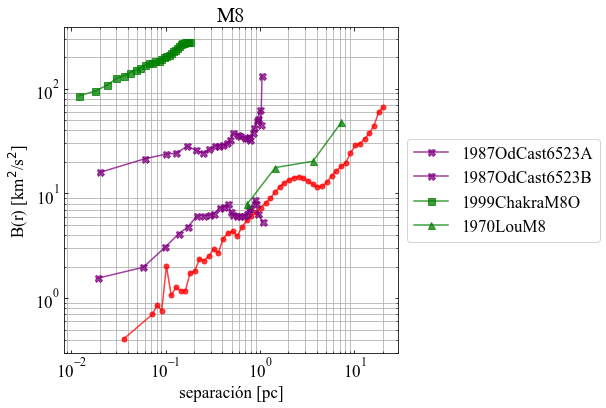

In [21]:
fig, ax=plt.subplots(figsize=(6,6))


plt.loglog(r_M8,B_M8,marker='o',color='red',alpha=0.75, markersize=5)
plt.loglog(DataH[9].pc,DataH[9].S,marker='X',color='purple',alpha=0.75, markersize=7, label=  DataNH[9])
plt.loglog(DataH[10].pc,DataH[10].S,marker='X',color='purple',alpha=0.75, markersize=7, label=  DataNH[10])
plt.loglog(DataH[25].pc*0.006,DataH[25].S,marker='s',color='green',alpha=0.75, markersize=7, label=  DataNH[25])
plt.loglog(DataH[26].pc*0.363,DataH[26].S**2,marker='^',color='green',alpha=0.75, markersize=7, label=  DataNH[26])


ax.set(xlabel='separación [pc]', ylabel='B(r) [km$^{2}$/s$^{2}$]')
plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)
plt.grid(which='minor')
plt.title('M8')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
fig.savefig('plots/comp-M8.pdf', 
              bbox_inches='tight')

In [22]:
B={}
r={}

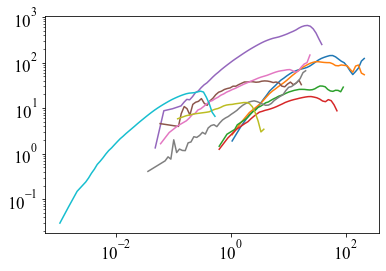

In [23]:
i=0
mask = SFresults[samples_results[0][i]]["SF"]["N pairs"] > 0
plt.loglog(SFresults[samples_results[0][i]]['s'][mask],SFresults[samples_results[0][i]]['b2'][mask])
i=1
mask = SFresults[samples_results[0][i]]["SF"]["N pairs"] > 0
plt.loglog(SFresults[samples_results[0][i]]['s'][mask],SFresults[samples_results[0][i]]['b2'][mask])
i=2
mask = SFresults[samples_results[0][i]]["SF"]["N pairs"] > 0
plt.loglog(SFresults[samples_results[0][i]]['s'][mask],SFresults[samples_results[0][i]]['b2'][mask])
i=3
mask = SFresults[samples_results[0][i]]["SF"]["N pairs"] > 0
plt.loglog(SFresults[samples_results[0][i]]['s'][mask],SFresults[samples_results[0][i]]['b2'][mask])
i=4
mask = SFresults[samples_results[0][i]]["SF"]["N pairs"] > 0
plt.loglog(SFresults[samples_results[0][i]]['s'][mask],SFresults[samples_results[0][i]]['b2'][mask])
i=5
#mask = SFresults[samples_results[0][i]]["SF"]["N pairs"] > 0
plt.loglog(SFresults[samples_results[0][i]]['s'],SFresults[samples_results[0][i]]['b2'])
i=6
mask = SFresults[samples_results[0][i]]["SF"]["N pairs"] > 0
plt.loglog(SFresults[samples_results[0][i]]['s'][mask],SFresults[samples_results[0][i]]['b2'][mask])
i=7
#mask = SFresults[samples_results[0][i]]["SF"]["N pairs"] > 0
plt.loglog(SFresults[samples_results[0][i]]['s'],SFresults[samples_results[0][i]]['b2'])
i=8
mask = SFresults[samples_results[0][i]]["SF"]["N pairs"] > 0
plt.loglog(SFresults[samples_results[0][i]]['s'][mask],SFresults[samples_results[0][i]]['b2'][mask])
i=9
mask = SFresults[samples_results[0][i]]["SF"]["N pairs"] > 0
plt.loglog(SFresults[samples_results[0][i]]['s'][mask],SFresults[samples_results[0][i]]['b2'][mask])

In [24]:
!jupyter nbconvert --to script --no-prompt structure-functions-catalogue.ipynb

[NbConvertApp] Converting notebook structure-functions-catalogue.ipynb to script
[NbConvertApp] Writing 12731 bytes to structure-functions-catalogue.py


In [25]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 11.05569052696228 seconds ---
